### Detecting objects in photo review using roboflow

{'predictions': [{'x': 304.5, 'y': 431.0, 'width': 167.0, 'height': 338.0, 'confidence': 0.8826315402984619, 'class': 'pants', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 297.0, 'y': 159.5, 'width': 250.0, 'height': 287.0, 'confidence': 0.8444738388061523, 'class': 'jacket', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 308.5, 'y': 584.0, 'width': 135.0, 'height': 32.0, 'confidence': 0.4816056191921234, 'class': 'shoe', 'image_path': '/content/1627892_36712724_0.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '600', 'height': '600'}}


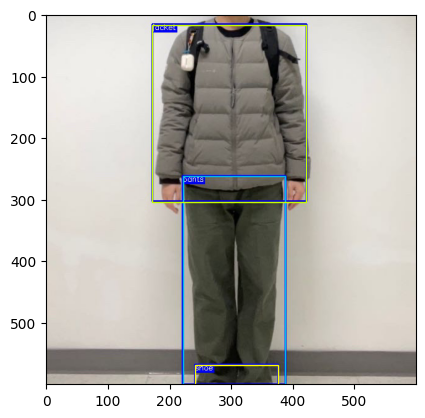

In [ ]:
# !pip install roboflow
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt

rf = Roboflow(api_key="D0iLK1yd2d3mAdFhxQul")

project = rf.workspace().project("clothing-detection-scn9m")
model = project.version(1).model

path = "/content/1758351_28376532_0.jpg"
prediction = model.predict(path, confidence=40, overlap=30).json()

object_num = len(prediction['predictions'])
object_name = [prediction['predictions'][i]['class'] for i in range(object_num)]

path = "/content/1758351_28376532_0.jpg"
model.predict(path, confidence=40, overlap=30).save(path)

def image_crop(img,prediction,object):
  num = 0
  x= prediction['predictions'][num]['x']
  y = prediction['predictions'][num]['y']
  w = prediction['predictions'][num]['width']
  h = prediction['predictions'][num]['height']
  img = cv2.imread(img)
  cropped = img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]
  return cropped

img = '/content/1758351_28376532_0.jpg'
cropped_img = image_crop(img,prediction,'jacket')
print(prediction.json())
prediction.plot()